In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
sns.set()

In [2]:
pd.options.display.max_columns=None
pd.options.display.max_rows=None
#used to view all data

In [3]:
df=pd.read_csv('carsdata.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

In [5]:
#as we can see therre are many null values,as  we r replacing nan numeric values with mean

In [6]:
df.head(2)

Make                Model   Price  Year  Kilometer Fuel Type  \
0          Honda  Amaze 1.2 VX i-VTEC  505000  2017      87150    Petrol   
1  Maruti Suzuki      Swift DZire VDI  450000  2014      75000    Diesel   

  Transmission  Location  Color   Owner Seller Type   Engine  \
0       Manual      Pune   Grey   First   Corporate  1198 cc   
1       Manual  Ludhiana  White  Second  Individual  1248 cc   

           Max Power         Max Torque Drivetrain  Length   Width  Height  \
0  87 bhp @ 6000 rpm  109 Nm @ 4500 rpm        FWD  3990.0  1680.0  1505.0   
1  74 bhp @ 4000 rpm  190 Nm @ 2000 rpm        FWD  3995.0  1695.0  1555.0   

   Seating Capacity  Fuel Tank Capacity  
0               5.0                35.0  
1               5.0                42.0

In [7]:
df['Length']=df['Length'].fillna(df['Length'].mean())

In [8]:
df['Width']=df['Width'].fillna(df['Width'].mean())

In [9]:
df['Height']=df['Height'].fillna(df['Height'].mean())
df['Seating Capacity']=df['Seating Capacity'].fillna(df['Seating Capacity'].mean())

In [10]:
df['Fuel Tank Capacity']=df['Fuel Tank Capacity'].fillna(df['Fuel Tank Capacity'].mean())

In [11]:
#now we are replacing nan categorical value with mode
#most repeating value

In [12]:
df['Engine'].mode()[0]

'1197 cc'

In [13]:
df['Engine']=df['Engine'].fillna(df['Engine'].mode()[0])

In [14]:
df['Max Power'].fillna( df['Max Power'].mode()[0],inplace=True)

In [15]:
df['Max Torque'].fillna( df['Max Torque'].mode()[0],inplace=True)

In [16]:
df['Drivetrain'].fillna(df['Drivetrain'].mode()[0],inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              2059 non-null   object 
 12  Max Power           2059 non-null   object 
 13  Max Torque          2059 non-null   object 
 14  Drivetrain          2059 non-null   object 
 15  Length              2059 non-null   float64
 16  Width 

In [18]:
#missing values had been filled

In [19]:
#data visulazition----------------------------------------------------------------------------------------------------

In [20]:
top10_models_year=pd.DataFrame(df.groupby(['Year','Make']).count()['Model']).reset_index().sort_values('Model',ascending=False)

In [21]:
top_10_models=top10_models_year[:10]
top_10_models


Year           Make  Model
160  2017  Maruti Suzuki     74
184  2018  Maruti Suzuki     58
207  2019  Maruti Suzuki     56
176  2018        Hyundai     44
199  2019        Hyundai     42
136  2016  Maruti Suzuki     42
118  2015  Maruti Suzuki     41
100  2014  Maruti Suzuki     38
132  2016        Hyundai     36
152  2017        Hyundai     35

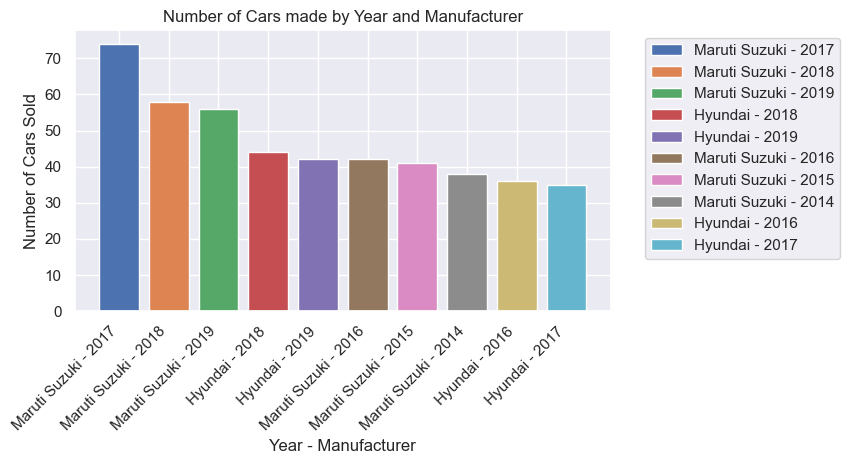

In [22]:
for index, row in top_10_models.iterrows():
    label = f"{row['Make']} - {row['Year']}"
    plt.bar(label, row['Model'], label=label)

# Adding labels and title
plt.xlabel('Year - Manufacturer')
plt.ylabel('Number of Cars Sold')
plt.title('Number of Cars made by Year and Manufacturer')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Adding legend
plt.legend(bbox_to_anchor=(1.05, 1))

# Displaying the plot
plt.show()

In [24]:
fuel_wise_price=pd.DataFrame(df.groupby('Fuel Type').sum()['Price']).sort_values('Price',ascending=False).reset_index()

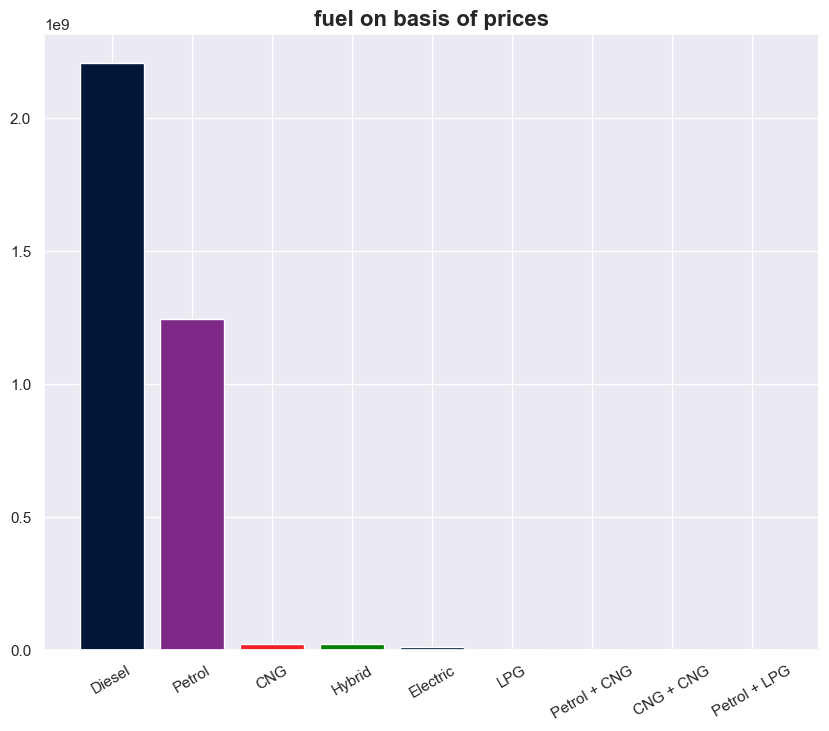

In [25]:
plt.figure(figsize=(10,8))
plt.bar(x=fuel_wise_price['Fuel Type'],height=fuel_wise_price['Price'],
                                                              
        color =["#011638", "#7e2987", "#ef2026","green"])

plt.title("fuel on basis of prices",fontsize=16,fontweight="bold")
plt.xticks(rotation=30)

plt.show()

Observation: According to this bar chart,Diesel cars are made more as compare to other fuels type

In [27]:
sold_color=pd.DataFrame(df.groupby('Color').count()['Make']).sort_values('Make',ascending=False).reset_index()

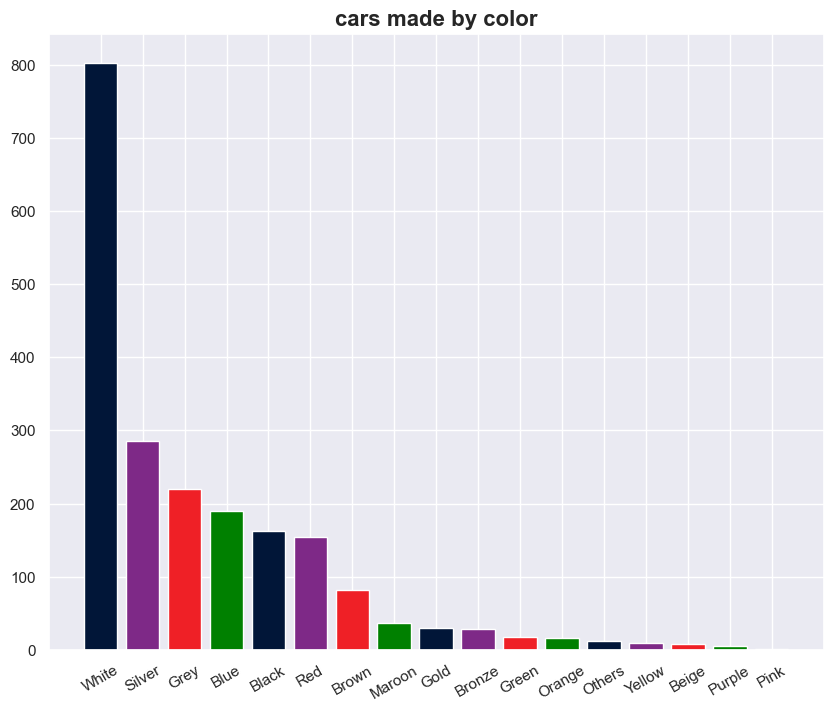

In [28]:
plt.figure(figsize=(10,8))
plt.bar(x=sold_color['Color'],height=sold_color['Make'],
                                                              
        color =["#011638", "#7e2987", "#ef2026","green"])

plt.title("cars made by color",fontsize=16,fontweight="bold")
plt.xticks(rotation=30)

plt.show()

Observation- According to above bar chart we can observe that most car were made of white color 

In [30]:
#dealing with outliers

<Axes: >

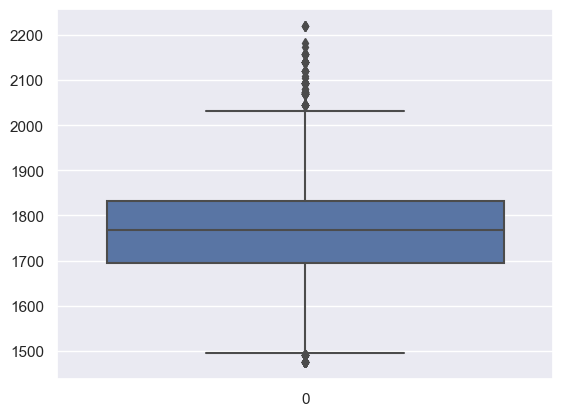

In [31]:
sns.boxplot(df['Width'])

In [32]:
q1=df['Width'].quantile(0.25)
q3=df['Width'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)

1695.0 1831.0 136.0


In [33]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
print(upper_limit,lower_limit)

2035.0 1491.0


In [34]:
#capping --changing the outlier value to upper or lower limit
new_df=df.copy()
new_df.loc[new_df['Width']>upper_limit,'Width']=upper_limit
new_df.loc[new_df['Width']<lower_limit,'Width']=lower_limit

<Axes: >

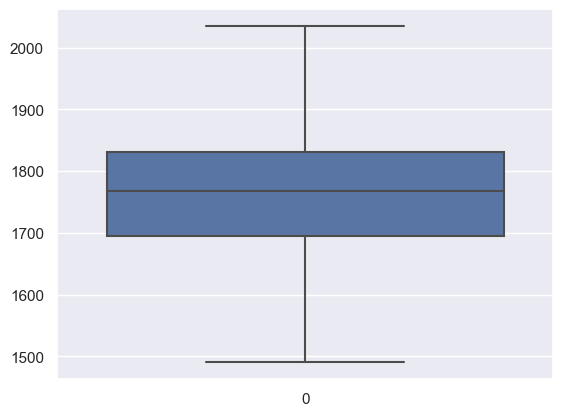

In [35]:
sns.boxplot(new_df['Width'])

<Axes: >

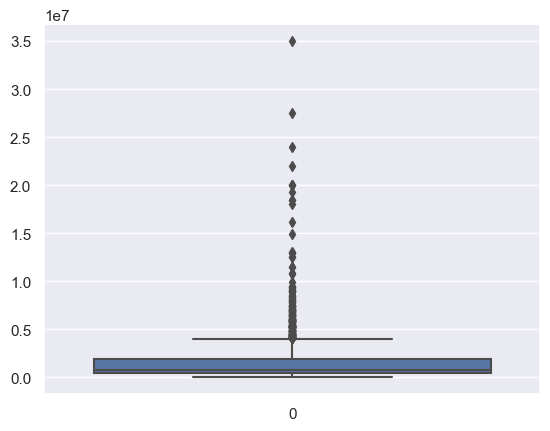

In [36]:
sns.boxplot(df['Price'])

In [37]:
q1=df['Price'].quantile(0.25)
q3=df['Price'].quantile(0.75)
iqr=q3-q1

In [38]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
print(upper_limit,lower_limit)

4085001.5 -1675002.5


In [39]:
new_df.loc[new_df['Price']<lower_limit,'Price']=lower_limit
new_df.loc[new_df['Price']>upper_limit,'Price']=upper_limit

<Axes: >

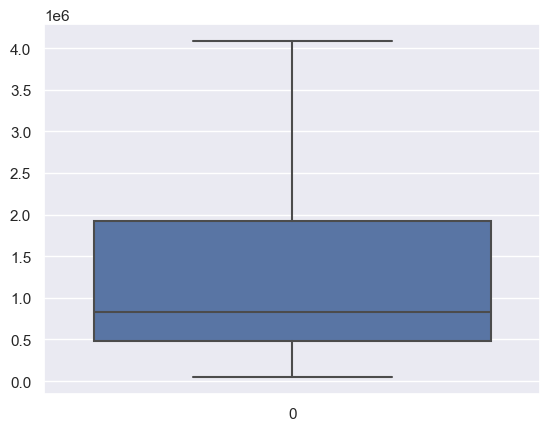

In [40]:
sns.boxplot(new_df['Price'])

In [41]:
df=new_df

In [42]:
#data transformation

In [43]:
df['Location'].unique()

array(['Pune', 'Ludhiana', 'Lucknow', 'Mangalore', 'Mumbai', 'Coimbatore',
       'Bangalore', 'Delhi', 'Raipur', 'Kanpur', 'Patna', 'Vadodara',
       'Hyderabad', 'Yamunanagar', 'Gurgaon', 'Jaipur', 'Deoghar', 'Agra',
       'Goa', 'Warangal', 'Jalandhar', 'Noida', 'Ahmedabad', 'Mohali',
       'Navi Mumbai', 'Ghaziabad', 'Kolkata', 'Zirakpur', 'Nagpur',
       'Thane', 'Faridabad', 'Ranchi', 'Chandigarh', 'Amritsar',
       'Chennai', 'Udupi', 'Panvel', 'Jamshedpur', 'Aurangabad',
       'Rudrapur', 'Nashik', 'Varanasi', 'Salem', 'Dehradun', 'Valsad',
       'Haldwani', 'Dharwad', 'Surat', 'Indore', 'Karnal', 'Panchkula',
       'Mysore', 'Rohtak', 'Ambala Cantt', 'Samastipur', 'Unnao',
       'Purnea', 'Bhubaneswar', 'Kheda', 'Kollam', 'Meerut', 'Ernakulam',
       'Kharar', 'Mirzapur', 'Bhopal', 'Gorakhpur', 'Guwahati',
       'Allahabad', 'Muzaffurpur', 'Faizabad', 'Kota', 'Pimpri-Chinchwad',
       'Dak. Kannada', 'Ranga Reddy', 'Bulandshahar', 'Roorkee',
       'Siliguri'], dty

In [44]:
north_india = np.array(['Delhi', 'Lucknow', 'Kanpur', 'Ghaziabad', 'Noida', 'Varanasi', 'Agra', 'Allahabad', 'Meerut', 'Gorakhpur', 'Faizabad', 'Bulandshahar', 'Ludhiana', 'Jalandhar', 'Ambala Cantt', 'Panchkula', 'Karnal', 'Rohtak', 'Unnao', 'Purnea', 'Muzaffurpur', 'Faridabad', 'Raipur', 'Yamunanagar', 'Gurgaon', 'Mohali', 'Zirakpur', 'Chandigarh', 'Amritsar', 'Rudrapur', 'Dehradun', 'Valsad', 'Haldwani', 'Samastipur', 'Kheda', 'Kharar', 'Mirzapur', 'Guwahati', 'Kota', 'Dak. Kannada', 'Roorkee'])
south_india = np.array(['Bangalore', 'Mangalore', 'Udupi', 'Chennai', 'Coimbatore', 'Salem', 'Hyderabad', 'Warangal','Goa','Ernakulam', 'Kollam', 'Pondicherry', 'Mysore'])
east_india = np.array(['Kolkata', 'Patna', 'Deoghar', 'Ranchi', 'Jamshedpur', 'Siliguri', 'Bhubaneswar', 'Guwahati'])
west_india=np.array(['Mumbai', 'Panvel', 'Nashik', 'Dharwad','Pune', 'Navi Mumbai', 'Thane', 'Nagpur', 'Aurangabad', 'Ahmedabad', 'Vadodara', 'Surat', 'Jaipur', 'Indore', 'Bhopal', 'Pimpri-Chinchwad', 'Ranga Reddy'
                    ])


In [45]:
df['Location']=np.where(np.isin(df['Location'],west_india),'west_india',df['Location'])
#basically it is if-else
df['Location']=np.where(np.isin(df['Location'],south_india),"south_india",df['Location'])
df['Location']=np.where(np.isin(df['Location'],east_india),"east_india",df['Location'])
df['Location']=np.where(np.isin(df['Location'],north_india),"north_india",df['Location'])
df['Location']
#np.isin(dataset,array_of data)--gives boolean value

0        west_india
1       north_india
2       north_india
3       south_india
4        west_india
5        west_india
6        west_india
7       south_india
8        west_india
9        west_india
10       west_india
11      south_india
12      south_india
13      south_india
14      south_india
15      south_india
16      south_india
17      south_india
18      south_india
19      north_india
20       west_india
21      south_india
22      south_india
23      south_india
24      north_india
25       west_india
26       west_india
27       west_india
28       west_india
29      north_india
30       west_india
31      north_india
32       west_india
33       west_india
34      north_india
35       west_india
36       east_india
37       west_india
38       west_india
39       east_india
40       west_india
41       west_india
42      south_india
43       west_india
44       east_india
45      north_india
46      north_india
47      north_india
48       west_india
49       west_india


In [46]:
df['Location'].unique()

array(['west_india', 'north_india', 'south_india', 'east_india'],
      dtype=object)

In [47]:
df['Owner'].unique()

array(['First', 'Second', 'Third', 'Fourth', 'UnRegistered Car',
       '4 or More'], dtype=object)

In [48]:
df['Owner']=np.where(df['Owner']=='Fourth','4 or More',df['Owner'])
df['Owner'].unique()

array(['First', 'Second', 'Third', '4 or More', 'UnRegistered Car'],
      dtype=object)

In [49]:
mapping={
    'First':5, 'Second':4, 'Third':3, '4 or More':2, 'UnRegistered Car':1
}
#replace

In [50]:
df['Owner']=df['Owner'].map(mapping)
df['Owner']

0       5
1       4
2       5
3       5
4       5
5       5
6       4
7       4
8       5
9       5
10      5
11      5
12      5
13      5
14      5
15      5
16      5
17      5
18      5
19      5
20      5
21      5
22      5
23      5
24      5
25      5
26      5
27      5
28      5
29      5
30      5
31      5
32      5
33      5
34      4
35      5
36      5
37      5
38      4
39      5
40      5
41      5
42      5
43      5
44      5
45      4
46      5
47      5
48      5
49      5
50      5
51      5
52      5
53      5
54      4
55      5
56      5
57      5
58      4
59      5
60      5
61      5
62      5
63      5
64      4
65      5
66      5
67      5
68      3
69      5
70      5
71      5
72      5
73      5
74      5
75      5
76      5
77      5
78      5
79      5
80      4
81      5
82      5
83      5
84      5
85      5
86      5
87      5
88      5
89      5
90      5
91      5
92      5
93      4
94      4
95      5
96      4
97      5
98      5
99      5


In [51]:
df['Owner'].unique()

array([5, 4, 3, 2, 1], dtype=int64)

In [52]:
df['Color'].unique()

array(['Grey', 'White', 'Maroon', 'Red', 'Blue', 'Orange', 'Silver',
       'Brown', 'Black', 'Bronze', 'Gold', 'Beige', 'Green', 'Yellow',
       'Purple', 'Others', 'Pink'], dtype=object)

In [53]:
color_mapping = {
    'Grey': 'Neutral',
    'White': 'Neutral',
    'Silver': 'Neutral',
    'Black': 'Neutral',
    'Maroon': 'Warm',
    'Red': 'Warm',
    'Orange': 'Warm',
    'Brown': 'Warm',
    'Bronze': 'Warm',
    'Gold': 'Warm',
    'Beige': 'Warm',
    'Yellow': 'Warm',
    'Pink': 'Warm',
    'Blue': 'Cool',
    'Green': 'Cool',
    'Purple': 'Cool',
    'Others': 'Others'
}

In [54]:
df['Color']=df['Color'].map(color_mapping)
df['Color'].unique()

array(['Neutral', 'Warm', 'Cool', 'Others'], dtype=object)

In [55]:
df['Fuel Type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric', 'CNG + CNG',
       'Hybrid', 'Petrol + CNG', 'Petrol + LPG'], dtype=object)

In [56]:
df['Fuel Type']=np.where(np.isin(df['Fuel Type'],['CNG + CNG',
       'Hybrid', 'Petrol + CNG', 'Petrol + LPG']),"others",df['Fuel Type'])

In [57]:
df['Fuel Type']=np.where(df['Fuel Type'].isin(['Petrol', 'Diesel', 'CNG', 'LPG','others']),"non-electric",df['Fuel Type'])

In [58]:
df['Fuel Type'].unique()

array(['non-electric', 'Electric'], dtype=object)

In [59]:
color=pd.get_dummies(df['Color'],dtype=int)
#makes new column 

In [60]:
color

Cool  Neutral  Others  Warm
0        0        1       0     0
1        0        1       0     0
2        0        0       0     1
3        0        0       0     1
4        0        1       0     0
5        0        1       0     0
6        0        1       0     0
7        0        1       0     0
8        0        1       0     0
9        0        1       0     0
10       0        0       0     1
11       0        1       0     0
12       1        0       0     0
13       0        0       0     1
14       0        1       0     0
15       0        0       0     1
16       0        1       0     0
17       0        1       0     0
18       0        1       0     0
19       0        1       0     0
20       0        1       0     0
21       0        0       0     1
22       0        1       0     0
23       1        0       0     0
24       0        1       0     0
25       0        1       0     0
26       0        1       0     0
27       0        0       0     1
28       0        1       0     0
29       0        1       0     0
30       1        0       0     0
31       0        1       0     0
32       0        1       0     0
33       0        0       0     1
34       0        1       0     0
35       0        1       0     0
36       0        1       0     0
37       0        0       0     1
38       0        1       0     0
39       0        1       0     0
40       0        1       0     0
41       0        1       0     0
42       0        1       0     0
43       0        1       0     0
44       0        0       0     1
45       0        1       0     0
46       0        1       0     0
47       0        1       0     0
48       0        0       0     1
49       0        1       0     0
50       0        1       0     0
51       0        1       0     0
52       0        1       0     0
53       0        1       0     0
54       0        1       0     0
55       0        1       0     0
56       1        0       0     0
57       0        1       0     0
58       0        1       0     0
59       0        1       0     0
60       0        1       0     0
61       0        1       0     0
62       0        1       0     0
63       0        1       0     0
64       0        1       0     0
65       1        0       0     0
66       0        1       0     0
67       0        1       0     0
68       0        0       0     1
69       0        1       0     0
70       0        1       0     0
71       0        1       0     0
72       0        1       0     0
73       0        1       0     0
74       0        0       0     1
75       0        0       0     1
76       0        1       0     0
77       0        1       0     0
78       0        0       0     1
79       0        1       0     0
80       0        1       0     0
81       0        1       0     0
82       0        0       0     1
83       0        1       0     0
84       0        1       0     0
85       0        1       0     0
86       0        0       0     1
87       0        1       0     0
88       0        1       0     0
89       0        1       0     0
90       0        1       0     0
91       0        0       0     1
92       0        1       0     0
93       0        1       0     0
94       0        1       0     0
95       1        0       0     0
96       0        1       0     0
97       0        1       0     0
98       0        1       0     0
99       0        0       0     1
100      0        1       0     0
101      0        0       0     1
102      0        1       0     0
103      0        1       0     0
104      0        1       0     0
105      0        1       0     0
106      0        1       0     0
107      1        0       0     0
108      1        0       0     0
109      1        0       0     0
110      0        0       0     1
111      0        1       0     0
112      0        1       0     0
113      0        1       0     0
114      0        0       0     1
115      0        0       0     1
116      0        1       0 

In [62]:
label_encoder=LabelEncoder()
df['Fuel Type']=label_encoder.fit_transform(df['Fuel Type'])

In [63]:
df

Make                                              Model  \
0             Honda                                Amaze 1.2 VX i-VTEC   
1     Maruti Suzuki                                    Swift DZire VDI   
2           Hyundai                               i10 Magna 1.2 Kappa2   
3            Toyota                                           Glanza G   
4            Toyota                    Innova 2.4 VX 7 STR [2016-2020]   
5     Maruti Suzuki                                           Ciaz ZXi   
6     Mercedes-Benz                               CLA 200 Petrol Sport   
7               BMW                               X1 xDrive20d M Sport   
8             Skoda               Octavia 1.8 TSI Style Plus AT [2017]   
9            Nissan                                     Terrano XL (D)   
10          Hyundai                               Elite i20 Sportz 1.2   
11          Renault                           Kwid 1.0 RXT [2016-2019]   
12    Maruti Suzuki               Ciaz Alpha Hybrid 1.5 AT [2018-2020]   
13             Tata                             Harrier XZ [2019-2020]   
14       Volkswagen                                        Polo GT TSI   
15    Maruti Suzuki                        Celerio ZXi AMT [2019-2020]   
16    Maruti Suzuki                                   Alto 800 LXi (O)   
17    Maruti Suzuki                             Baleno Alpha Automatic   
18    Maruti Suzuki                                Wagon R ZXi 1.2 AMT   
19          Hyundai                                 Creta 1.6 E Petrol   
20    Maruti Suzuki                                   S-Presso VXi AMT   
21       Volkswagen                        Vento Comfortline Petrol AT   
22          Hyundai                      Santro Sportz AMT [2018-2020]   
23          Hyundai                Venue SX 1.0 (O) Petrol [2019-2020]   
24    Maruti Suzuki                                       Alto LXi CNG   
25    Maruti Suzuki                                     Ritz Zxi BS-IV   
26          Hyundai                           Creta 1.6 SX Plus Petrol   
27            Honda                                          Brio V MT   
28          Hyundai                                 Elite i20 Asta 1.2   
29            Honda                                  WR-V VX MT Petrol   
30          Hyundai                             Venue SX 1.0 Turbo iMT   
31          Hyundai                               Creta 1.6 SX Plus AT   
32             Ford                   Ecosport Titanium+ 1.0L EcoBoost   
33            Honda                                        CR-V 2.4 AT   
34          Hyundai                                    Santro GL (CNG)   
35             Tata                      Tiago Revotron XE [2016-2019]   
36             Tata                                  Tigor Revotorq XT   
37           Toyota                     Innova 2.4 G 8 STR [2016-2017]   
38    Mercedes-Benz                              GLC 220 d Progressive   
39          Hyundai                              Creta SX 1.6 CRDi (O)   
40    Mercedes-Benz                                 M-Class ML 250 CDI   
41           Toyota                         Corolla Altis VL AT Petrol   
42             Audi                   A4 2.0 TDI (177bhp) Premium Plus   
43    Mercedes-Benz                                SLK-Class SLK 200 K   
44          Hyundai                                 Elite i20 Asta 1.2   
45         Mahindra                                   Thar CRDe 4x4 AC   
46    Maruti Suzuki                                   Baleno Delta 1.2   
47    Maruti Suzuki                                    Celerio VXi AMT   
48    Maruti Suzuki                                      Ciaz VDi SHVS   
49    Maruti Suzuki                                           Ciaz VXi   
50          Hyundai                          Creta SX Plus 1.6 AT CRDI   
51          Hyundai                          Creta SX Plus 1.6  Petrol   
52          Renault                               Kwid 1.0 RXT AMT Opt   
53               MG

In [64]:
aut_man=pd.get_dummies(df['Transmission'],dtype=int)
aut_man


Automatic  Manual
0             0       1
1             0       1
2             0       1
3             0       1
4             0       1
5             0       1
6             1       0
7             1       0
8             1       0
9             0       1
10            0       1
11            0       1
12            1       0
13            0       1
14            1       0
15            1       0
16            0       1
17            1       0
18            1       0
19            0       1
20            1       0
21            1       0
22            1       0
23            0       1
24            0       1
25            0       1
26            0       1
27            0       1
28            0       1
29            0       1
30            0       1
31            1       0
32            0       1
33            1       0
34            0       1
35            0       1
36            0       1
37            0       1
38            1       0
39            0       1
40            1       0
41            1       0
42            1       0
43            1       0
44            0       1
45            0       1
46            0       1
47            1       0
48            0       1
49            0       1
50            1       0
51            0       1
52            1       0
53            0       1
54            1       0
55            0       1
56            1       0
57            1       0
58            0       1
59            0       1
60            1       0
61            0       1
62            0       1
63            0       1
64            0       1
65            1       0
66            1       0
67            1       0
68            0       1
69            1       0
70            1       0
71            0       1
72            1       0
73            1       0
74            0       1
75            0       1
76            0       1
77            0       1
78            1       0
79            1       0
80            1       0
81            1       0
82            0       1
83            1       0
84            0       1
85            1       0
86            0       1
87            1       0
88            1       0
89            0       1
90            0       1
91            0       1
92            0       1
93            1       0
94            1       0
95            1       0
96            1       0
97            0       1
98            0       1
99            0       1
100           0       1
101           0       1
102           1       0
103           0       1
104           1       0
105           1       0
106           0       1
107           0       1
108           0       1
109           0       1
110           0       1
111           1       0
112           1       0
113           0       1
114           1       0
115           0       1
116           0       1
117           0       1
118           0       1
119           1       0
120           0       1
121           1       0
122           0       1
123           0       1
124           0       1
125           0       1
126           0       1
127           1       0
128           1       0
129           1       0
130           1       0
131           1       0
132           0       1
133           0       1
134           1       0
135           0       1
136           0       1
137           1       0
138           0       1
139           1       0
140           0       1
141           0       1
142           1       0
143           0       1
144           0       1
145           0       1
146           0       1
147           1       0
148           1       0
149           0       1
150           0       1
151           0       1
152           1       0
153           0       1
154           0       1
155           0       1
156           1       0
157           1       0
158           1       0
159           0       1
160           1       0
161           1       0
162           1       0
163           1       0
164           1       0
165           0       

In [66]:
df.drop(['Model','Make'],axis=1,inplace =True)

In [67]:
df

Price  Year  Kilometer  Fuel Type Transmission     Location  \
0      505000.0  2017      87150          1       Manual   west_india   
1      450000.0  2014      75000          1       Manual  north_india   
2      220000.0  2011      67000          1       Manual  north_india   
3      799000.0  2019      37500          1       Manual  south_india   
4     1950000.0  2018      69000          1       Manual   west_india   
5      675000.0  2017      73315          1       Manual   west_india   
6     1898999.0  2015      47000          1    Automatic   west_india   
7     2650000.0  2017      75000          1    Automatic  south_india   
8     1390000.0  2017      56000          1    Automatic   west_india   
9      575000.0  2015      85000          1       Manual   west_india   
10     591000.0  2017      20281          1       Manual   west_india   
11     459999.0  2018      22541          1       Manual  south_india   
12    1075000.0  2019      30672          1    Automatic  south_india   
13    1695000.0  2019      20856          1       Manual  south_india   
14     944999.0  2017      41417          1    Automatic  south_india   
15     569000.0  2016      11471          1    Automatic  south_india   
16     449000.0  2019       3583          1       Manual  south_india   
17     894999.0  2018      21365          1    Automatic  south_india   
18     699000.0  2020      30777          1    Automatic  south_india   
19     740000.0  2016      60125          1       Manual  north_india   
20     470000.0  2020       2169          1    Automatic   west_india   
21     765000.0  2015      60240          1    Automatic  south_india   
22     589000.0  2018      13772          1    Automatic  south_india   
23     999000.0  2019      27464          1       Manual  south_india   
24     370000.0  2019      47377          1       Manual  north_india   
25     325000.0  2013      23086          1       Manual   west_india   
26    1175000.0  2019      36313          1       Manual   west_india   
27     351000.0  2014      39276          1       Manual   west_india   
28     551000.0  2015      47752          1       Manual   west_india   
29     819999.0  2018      27963          1       Manual  north_india   
30     990000.0  2020      24013          1       Manual   west_india   
31     925000.0  2016      66000          1    Automatic  north_india   
32     535000.0  2015      28000          1       Manual   west_india   
33     860000.0  2013      67000          1    Automatic   west_india   
34     145000.0  2009      72000          1       Manual  north_india   
35     409000.0  2018      27069          1       Manual   west_india   
36     490000.0  2018      43000          1       Manual   east_india   
37    1900000.0  2019      71000          1       Manual   west_india   
38    3850000.0  2017      45600          1    Automatic   west_india   
39    1125000.0  2018      60000          1       Manual   east_india   
40    2300000.0  2014     105101          1    Automatic   west_india   
41    1095000.0  2016      45000          1    Automatic   west_india   
42    1575000.0  2013      66000          1    Automatic  south_india   
43    2400000.0  2010      34105          1    Automatic   west_india   
44     525000.0  2015      68397          1       Manual   east_india   
45     625000.0  2015      65000          1       Manual  north_india   
46     605000.0  2019      27469          1       Manual  north_india   
47     412000.0  2016      41058          1    Automatic  north_india   
48     625000.0  2016      51330          1       Manual   west_india   
49     511000.0  2015      45969          1       Manual   west_india   
50    1150000.0  2017      66602          1    Automatic   west_india   
51     885000.0  2016      57983          1       Manual   west_india   
52     470000.0  2019      11183          1    Automatic   west_india   
53    1611000.0  2019      46301          1       Manual   west_indi

In [69]:
df['Transmission']=label_encoder.fit_transform(df['Transmission'])

In [70]:
df['Location']=label_encoder.fit_transform(df['Location'])
df['Color']=label_encoder.fit_transform(df['Color'])
df['Seller Type']=label_encoder.fit_transform(df['Seller Type'])
df['Engine']=label_encoder.fit_transform(df['Engine'])
df['Max Power']=label_encoder.fit_transform(df['Max Power'])
df['Max Torque']=label_encoder.fit_transform(df['Max Torque'])
df['Drivetrain']=label_encoder.fit_transform(df['Drivetrain'])
df

Price  Year  Kilometer  Fuel Type  Transmission  Location  Color  \
0      505000.0  2017      87150          1             1         3      1   
1      450000.0  2014      75000          1             1         1      1   
2      220000.0  2011      67000          1             1         1      3   
3      799000.0  2019      37500          1             1         2      3   
4     1950000.0  2018      69000          1             1         3      1   
5      675000.0  2017      73315          1             1         3      1   
6     1898999.0  2015      47000          1             0         3      1   
7     2650000.0  2017      75000          1             0         2      1   
8     1390000.0  2017      56000          1             0         3      1   
9      575000.0  2015      85000          1             1         3      1   
10     591000.0  2017      20281          1             1         3      3   
11     459999.0  2018      22541          1             1         2      1   
12    1075000.0  2019      30672          1             0         2      0   
13    1695000.0  2019      20856          1             1         2      3   
14     944999.0  2017      41417          1             0         2      1   
15     569000.0  2016      11471          1             0         2      3   
16     449000.0  2019       3583          1             1         2      1   
17     894999.0  2018      21365          1             0         2      1   
18     699000.0  2020      30777          1             0         2      1   
19     740000.0  2016      60125          1             1         1      1   
20     470000.0  2020       2169          1             0         3      1   
21     765000.0  2015      60240          1             0         2      3   
22     589000.0  2018      13772          1             0         2      1   
23     999000.0  2019      27464          1             1         2      0   
24     370000.0  2019      47377          1             1         1      1   
25     325000.0  2013      23086          1             1         3      1   
26    1175000.0  2019      36313          1             1         3      1   
27     351000.0  2014      39276          1             1         3      3   
28     551000.0  2015      47752          1             1         3      1   
29     819999.0  2018      27963          1             1         1      1   
30     990000.0  2020      24013          1             1         3      0   
31     925000.0  2016      66000          1             0         1      1   
32     535000.0  2015      28000          1             1         3      1   
33     860000.0  2013      67000          1             0         3      3   
34     145000.0  2009      72000          1             1         1      1   
35     409000.0  2018      27069          1             1         3      1   
36     490000.0  2018      43000          1             1         0      1   
37    1900000.0  2019      71000          1             1         3      3   
38    3850000.0  2017      45600          1             0         3      1   
39    1125000.0  2018      60000          1             1         0      1   
40    2300000.0  2014     105101          1             0         3      1   
41    1095000.0  2016      45000          1             0         3      1   
42    1575000.0  2013      66000          1             0         2      1   
43    2400000.0  2010      34105          1             0         3      1   
44     525000.0  2015      68397          1             1         0      3   
45     625000.0  2015      65000          1             1         1      1   
46     605000.0  2019      27469          1             1         1      1   
47     412000.0  2016      41058          1             0         1      1   
48     625000.0  2016      51330          1             1         3      3   
49     511000.0  2015      45969          1             1         3      1   
50    1150000.0  2017      66602